<a href="https://colab.research.google.com/github/G-who0212/video_image_processing/blob/main/KMeans/kMeans_clustering_MRI_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation with kMeans Clustering

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
# load image
img =  cv2.imread('MRI.png') # Reads an image into BGR Format

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)   #load image with RGB format
img_size = img.shape
print(img_size)



(276, 250, 3)


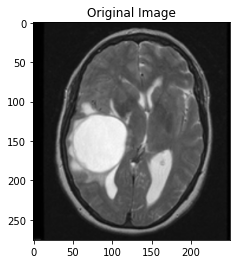

In [ ]:
# Display original image
plt.imshow(img)
plt.title("Original Image")
plt.show()

In [ ]:
# Reshape data

all_pixels  = img.reshape((-1,3)).astype(float)
print(all_pixels.shape)


(69000, 3)


In [ ]:
# Run k-means clustering
from sklearn.cluster import KMeans

K = 4       # Number of clusters

km_model = KMeans(n_clusters=K)
km_model.fit(all_pixels)


KMeans(n_clusters=4)

In [ ]:
# Learned Centroids
centers = km_model.cluster_centers_
print(centers) # In RGB Format


[[ 87.66142391  87.66142391  87.66142391]
 [223.06941357 223.06941357 223.06941357]
 [ 20.01135013  20.01135013  20.01135013]
 [139.76069364 139.76069364 139.76069364]]


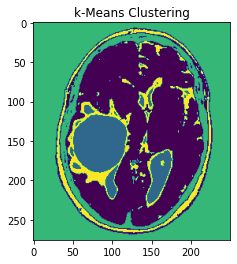

In [ ]:
# Display different cluster segments
segmented_img = km_model.labels_    # Clustering Result
segmented_img = segmented_img.reshape(img_size[0], img_size[1])
plt.imshow(segmented_img) 
plt.title("k-Means Clustering")
plt.show()

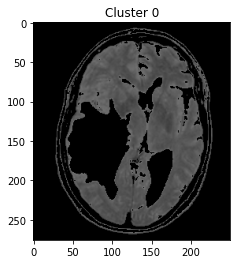

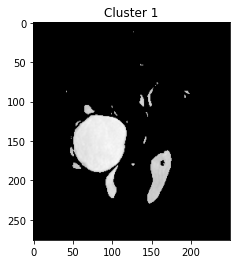

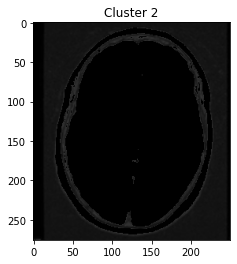

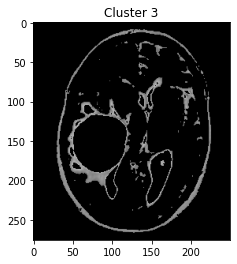

In [ ]:
# display different segments separately

for k in range(K):
    plt.imshow(img*(segmented_img == k)[...,None])
    plt.title('Cluster ' + str(k))
    plt.show()


# Todo: Implement your own kMeans Algorithm

In [ ]:
# L2 distance
def L2_distance(x, y):
    return np.sqrt( np.sum((x - y)**2, axis=1) )

In [ ]:
from os import kill
from numpy.lib.npyio import NpzFile
# My k-means implementation

def my_kMeans(all_data, num_clusters):

    num_data, data_dim = all_data.shape # data size # (69000, 3)

    # Centroid and cluster initialization
    centroids = np.random.rand(num_clusters, data_dim) * 256 # data_dim : 3(RGB)
    clusters = (-1)*np.ones(num_data)     # initialize all the clusters with -1

    max_iteration = 20
    for iter in range(max_iteration):
        # save current cluster
        current_clusters = clusters.copy()

        # update cluster
        for k in range(num_data):
            data = all_data[k]  # each data
            # print(data)
            # For each data, find the distance from the centroids
            dist = L2_distance(centroids, data)
            # print(dist)
            # find minimum distance (index) & save
            ########### Implement your code here ######################
            clusters[k] = dist.argmin()
            # print(dist.argmin())


        # update the centroids
        for m in range(num_clusters):   
            cluster_map = (clusters == m)
            num_samples_in_cluster = cluster_map.sum()
            # print(num_samples_in_cluster)
            # find the average of the cluster samples
            ########### Implement your code here ######################
            for k in range(num_data):
              if clusters[k] == m:
                centroids[m] += all_data[k]
            if num_samples_in_cluster != 0:
              centroids[m] /= num_samples_in_cluster
              
            #[:, None] 한 차원 늘리기?? 어떻게 쓰는 건지 모르겠음...


        # We stop when the clusters does not change
        if np.sqrt(((current_clusters - clusters)**2).sum()) < 1e-20:
            break

        current_clusters = clusters
    return clusters, centroids

In [ ]:
# Run your kMeans

K = 4

labels, cent = my_kMeans(all_pixels, K)

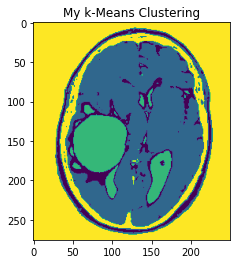

In [ ]:
# Display the segmentation results
seg_img = labels.reshape(img_size[0], img_size[1])
plt.imshow(seg_img) 
plt.title("My k-Means Clustering")
plt.show()

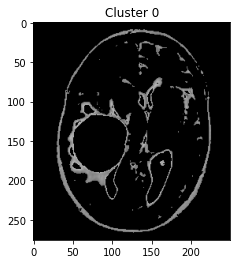

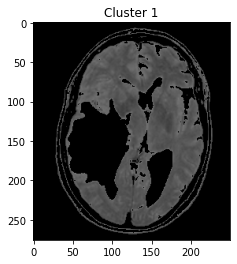

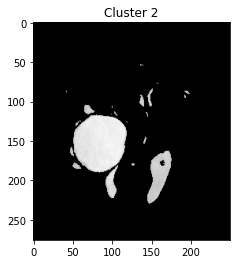

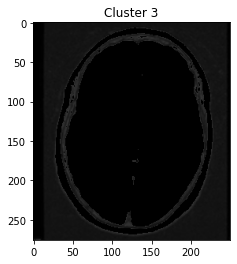

In [ ]:
for k in range(K):
    plt.imshow(img*(seg_img == k)[...,None])
    plt.title('Cluster ' + str(k))
    plt.show()
